In [18]:
import pylab as pl
import numpy as np
from scipy.stats import norm as nor
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['pois', 'gaus', 'chisq', 'logistic', 'binomial']
mymean = 100
df = mymean

In [3]:
md = {}

In [4]:
md['chisq'] = np.random.chisquare(df, size=100)
md['gaus'] = np.random.normal(mymean, size = 100)
md['pois'] = np.random.poisson(mymean, 100)
md['logistic'] = np.random.logistic(mymean, size = 100)
md['binomial'] = np.random.binomial(n = 200, p = 0.5, size = 100)

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))
print ("Gaussian mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))
print ("Pois mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))
print ("Logistic mean: %.2f, standard deviation: %.2f"%(md['logistic'].mean(), md['logistic'].std()))
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Chisq mean: 99.91, standard deviation: 13.88
Gaussian mean: 100.12, standard deviation: 1.01
Pois mean: 99.83, standard deviation: 8.82
Logistic mean: 100.16, standard deviation: 1.76
Binomial mean: 100.08, standard deviation: 6.96


In [6]:
mysize = (np.linspace(10,2000,100))

In [7]:
mysize = (mysize).astype(int)
mysize

array([  10,   30,   50,   70,   90,  110,  130,  150,  170,  190,  211,
        231,  251,  271,  291,  311,  331,  351,  371,  391,  412,  432,
        452,  472,  492,  512,  532,  552,  572,  592,  613,  633,  653,
        673,  693,  713,  733,  753,  773,  793,  814,  834,  854,  874,
        894,  914,  934,  954,  974,  994, 1015, 1035, 1055, 1075, 1095,
       1115, 1135, 1155, 1175, 1195, 1216, 1236, 1256, 1276, 1296, 1316,
       1336, 1356, 1376, 1396, 1417, 1437, 1457, 1477, 1497, 1517, 1537,
       1557, 1577, 1597, 1618, 1638, 1658, 1678, 1698, 1718, 1738, 1758,
       1778, 1798, 1819, 1839, 1859, 1879, 1899, 1919, 1939, 1959, 1979,
       2000])

In [8]:
dict_distribution = {}
dict_distribution['chisq'] = {} 
dict_distribution['gaus'] = {}
dict_distribution['pois'] = {}
dict_distribution['logistic'] = {} 
dict_distribution['binomial'] = {} 
for n in mysize:
    dict_distribution['chisq'][n] = np.random.chisquare(df, size = n)
    dict_distribution['gaus'][n] = np.random.normal(mymean, size = n)
    dict_distribution['pois'][n] = np.random.poisson(mymean, size = n)
    dict_distribution['logistic'][n] = np.random.logistic(mymean, size = n)
    dict_distribution['binomial'][n] = np.random.binomial(n = 200, p = 0.5, size = n)


In [9]:
dict_distribution['chisq']['means'] = {}
dict_distribution['gaus']['means'] = {}
dict_distribution['pois']['means'] = {}
dict_distribution['logistic']['means'] = {}
dict_distribution['binomial']['means'] = {}

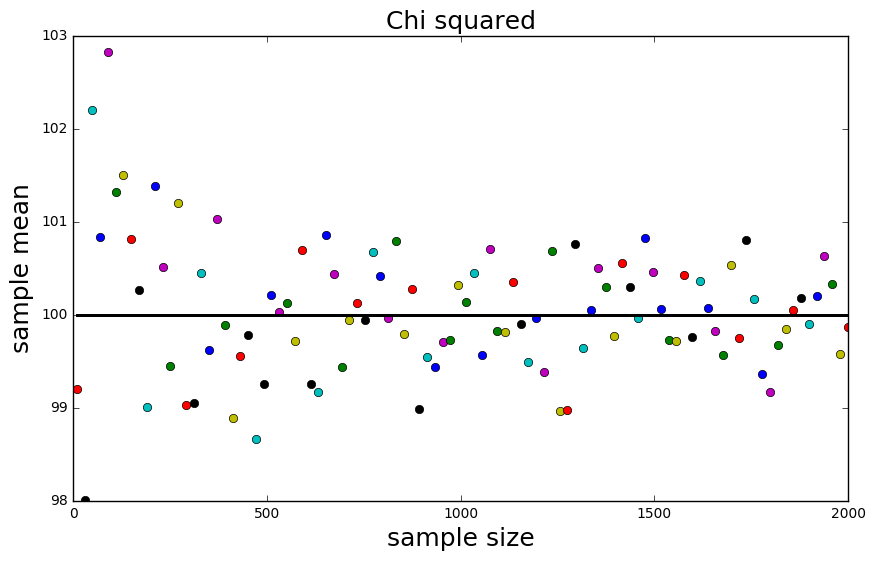

In [10]:
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict_distribution['chisq']:
    if not type(nn) == str:
        dict_distribution['chisq']['means'][nn] = dict_distribution['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, dict_distribution['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

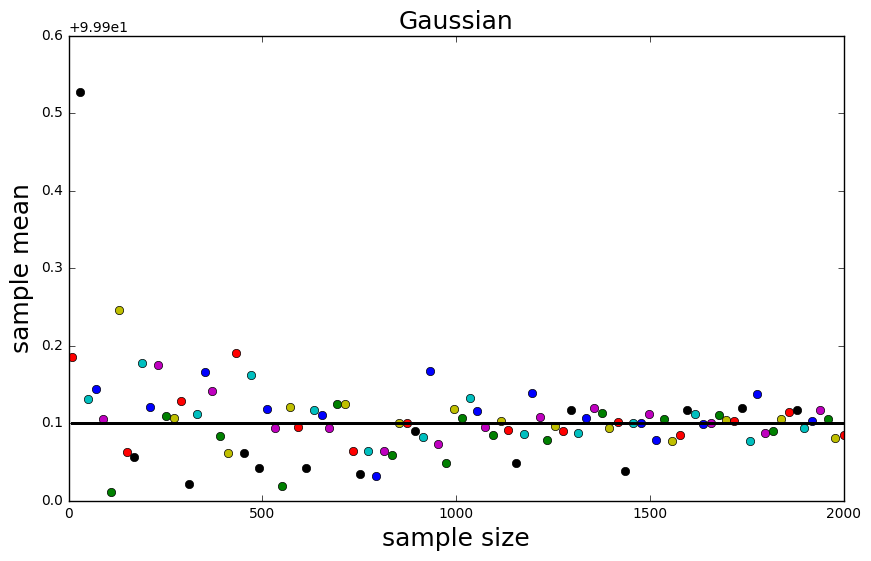

In [11]:
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict_distribution['gaus']:
    if not type(nn) == str:
        dict_distribution['gaus']['means'][nn] = dict_distribution['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, dict_distribution['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

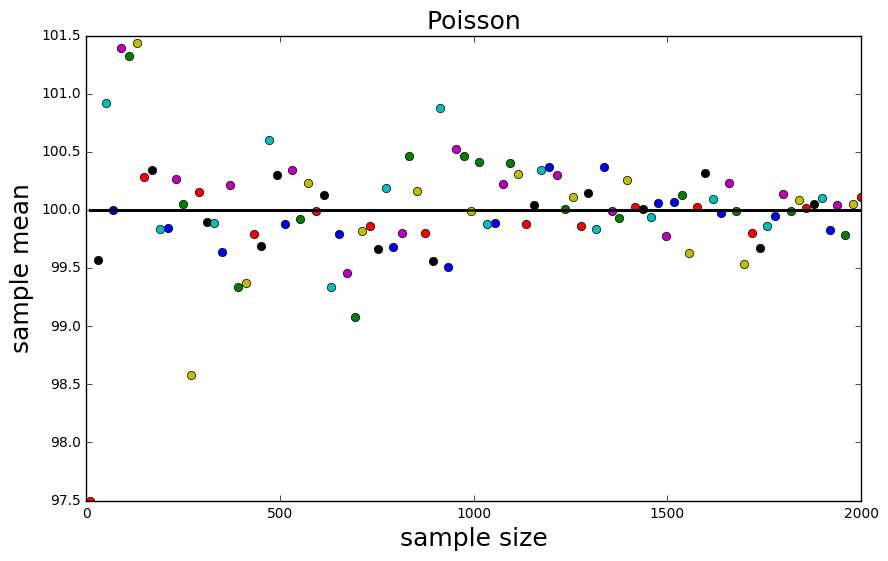

In [12]:
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict_distribution['pois']:
    if not type(nn) == str:
        dict_distribution['pois']['means'][nn] = dict_distribution['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, dict_distribution['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

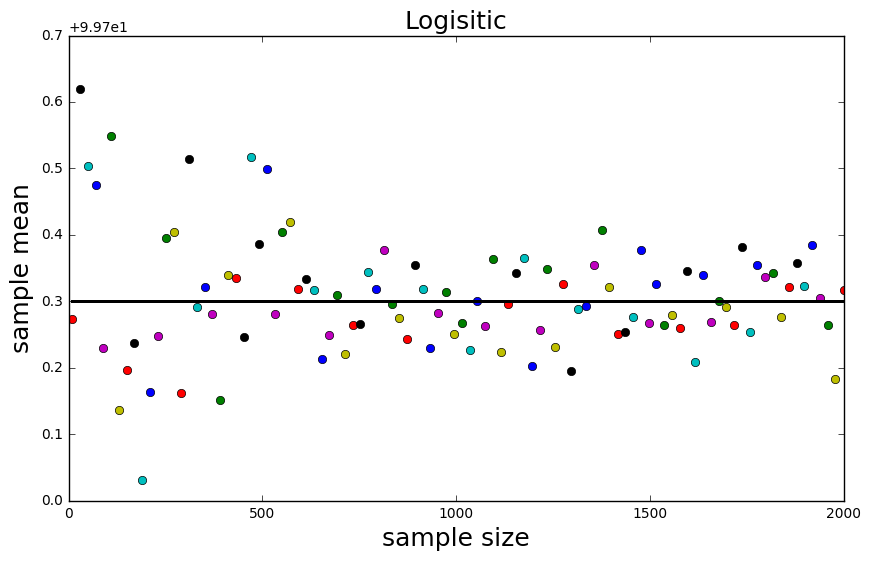

In [13]:
axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict_distribution['logistic']:
    if not type(nn) == str:
        dict_distribution['logistic']['means'][nn] = dict_distribution['logistic'][nn].mean()
        #and plot it
        axlogistic_mu_n.plot(nn, dict_distribution['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Logisitic', fontsize=18)
        axlogistic_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

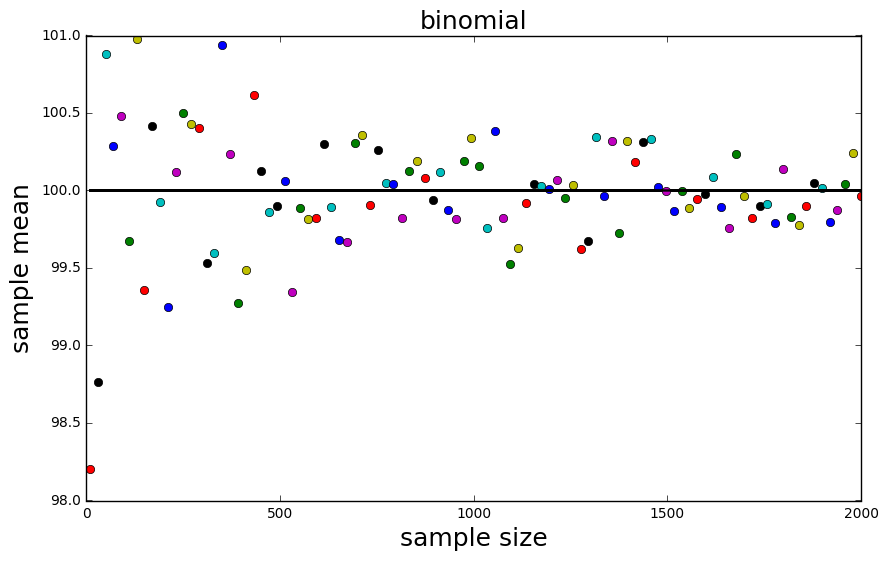

In [14]:
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict_distribution['binomial']:
    if not type(nn) == str:
        dict_distribution['binomial']['means'][nn] = dict_distribution['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, dict_distribution['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

In [15]:
allmeans = list(dict_distribution['chisq']['means'].values())
allmeans.extend(dict_distribution['gaus']['means'].values())
allmeans.extend(dict_distribution['logistic']['means'].values())
allmeans.extend(dict_distribution['pois']['means'].values())
allmeans.extend(dict_distribution['binomial']['means'].values())

In [16]:
len(allmeans)
allmean_numpy = np.array(allmeans)
allmean_mean = allmean_numpy.mean()
allmean_std = allmean_numpy.std()
print("%s %s"%(allmean_mean,allmean_std))

100.006907727 0.425617726906


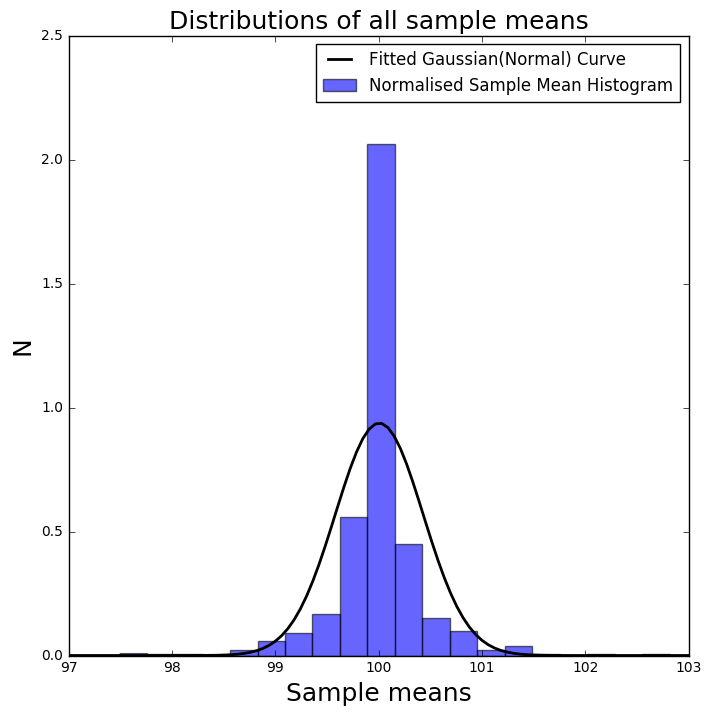

In [21]:
pl.figure(figsize=(8,8))

# Fit a normal distribution to the data:
mu, std = nor.fit(allmeans)

# Plot the histogram.
pl.hist(allmeans, bins=20, normed = True, alpha=0.6, color='b', label = 'Normalised Sample Mean Histogram')

# Plot the PDF.
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = nor.pdf(x, mu, std)
pl.plot(x, p, 'k', linewidth=2, label = 'Fitted Gaussian(Normal) Curve')

pl.xlabel('Sample means', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distributions of all sample means', fontsize = 18)
pl.legend()
pl.show()


## Figure 2: Plot of distribution of all means

The sample means from different distributions (poisson, normal, chisquare, logistic, binomial) have been plotted above. The resulting distribution is almost similar to the normal distribution as we have taken a large number of samples. This proves the 'Central Limit Theorem': 

The distribution of the means of N samples generated from the same parent distribution will be a normal distribution. 

The distribution will have a mean equal to the mean of the parent distribution - Eg. Mean of the sample means of chisquare distribution is 100

The distribution will have a standard deviation equal to the parent population standard deviation divided by the square root of the sample size 